In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/user/Downloads/AI-class-test/PAMAP_features.csv", index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [102]:
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

In [103]:
# 결측치 확인
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [104]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [105]:
df['sub_id'].value_counts()  

sub_id
5    1651
2    1618
8    1576
6    1556
1    1518
7    1430
4    1353
3    1042
9      29
Name: count, dtype: int64

In [106]:
df['activity_id'].value_counts()

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64

In [107]:
df['act_level'].value_counts()

act_level
moderate    5283
light       5124
vigorous    1366
Name: count, dtype: int64

In [108]:
df=df.drop(['sub_id', 'act_level'],axis=1)

In [109]:
X=df.drop('activity_id',axis=1)
X.head()

,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,2.582771,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,2.591651,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,17.220389,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,2.907890,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,0.153816,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [110]:
y=df['activity_id']
y.value_counts().sort_index()

activity_id
1     1203
2     1162
3     1220
4     1525
5      593
6     1035
7     1196
12     522
13     428
16    1099
17    1539
24     251
Name: count, dtype: int64

In [111]:
Y = pd.get_dummies(y).values

In [112]:
X = X.values

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [114]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (9418, 64)
X_test :  (2355, 64)
y_train :  (9418, 12)
y_test :  (2355, 12)


In [115]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(64,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(12,activation='softmax'))

model.compile(Adam(learning_rate=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,052 (74.42 KB)

 Trainable params: 19,052 (74.42 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4421 - loss: 2.2308 - val_accuracy: 0.7915 - val_loss: 0.5201
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8671 - loss: 0.3712 - val_accuracy: 0.8934 - val_loss: 0.3307
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9335 - loss: 0.2029 - val_accuracy: 0.9410 - val_loss: 0.1727
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1539 - val_accuracy: 0.9631 - val_loss: 0.1347
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9608 - loss: 0.1241 - val_accuracy: 0.9677 - val_loss: 0.1100
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9591 - loss: 0.1394 - val_accuracy: 0.9384 - val_loss: 0.1935
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1320 - val_accuracy: 0.9367 - val_loss: 0.2463
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9638 - loss: 0.1235 - val_accuracy: 0.

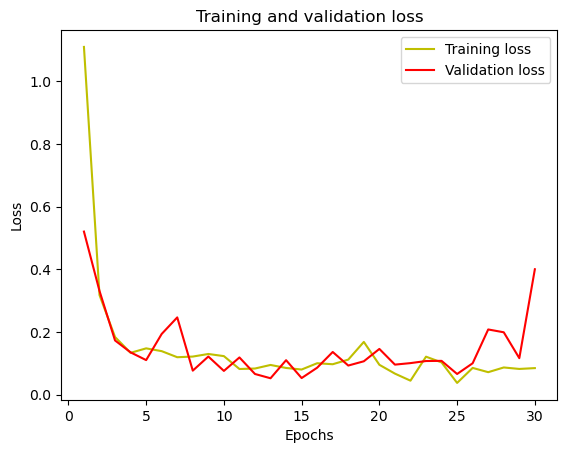

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

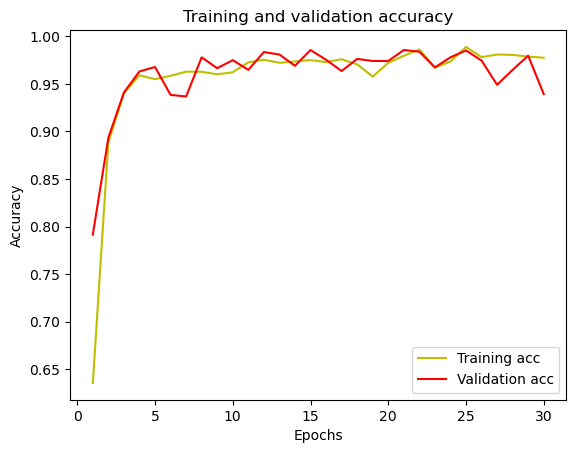

In [118]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [119]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       0.98      0.96      0.97       236
           2       1.00      0.89      0.94       236
           3       0.98      1.00      0.99       282
           4       1.00      0.53      0.70       122
           5       1.00      1.00      1.00       222
           6       0.77      0.94      0.85       242
           7       0.84      0.99      0.91       115
           8       0.97      0.85      0.91        86
           9       0.98      0.94      0.96       234
          10       0.89      0.99      0.94       284
          11       0.96      0.92      0.94        49

    accuracy                           0.94      2355
   macro avg       0.95      0.92      0.92      2355
weighted avg       0.95      0.94      0.94      2355

[[247   0   0   0   0   0   0   0   0   0   0   0]
 [  0 227   1   0   0   0   0   0   0   0   8   0]
 [  0   4 209   0   0   0   0  